In [1]:
from rootpy.io import root_open

def load_minbias_batch(j):
  global infile_r
  pufiles = ['root://cmsxrootd-site.fnal.gov//store/group/l1upgrades/L1MuonTrigger/P2_10_1_5/ntuple_SingleNeutrino_PU200/ParticleGuns/CRAB3/180719_210355/0000/ntuple_SingleNeutrino_PU200_%i.root' % (i+1) for i in xrange(63)]
  infile = pufiles[j]
  infile_r = root_open(infile)
  tree = infile_r.ntupler.tree
  print('[INFO] Opening file: %s' % infile)

  # Define collection
  tree.define_collection(name='hits', prefix='vh_', size='vh_size')
  tree.define_collection(name='tracks', prefix='vt_', size='vt_size')
  tree.define_collection(name='particles', prefix='vp_', size='vp_size')
  return tree

Welcome to JupyROOT 6.10/09


In [12]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

kDT, kCSC, kRPC, kGEM, kME0 = 0, 1, 2, 3, 4

In [27]:
jobs = [0,1,2,3,4]
nevents_per_job = 8000

# CSC only; 5 jobs, 8000 events per job, 12 sectors, 45 chambers per sector
counts = np.zeros((len(jobs),nevents_per_job,12,45), dtype=np.int32)

n = -1

for jobid in jobs:

  tree = load_minbias_batch(jobid)

  for ievt, evt in enumerate(tree):
    if n != -1 and ievt == n:
      break

    if (ievt % 1000) == 0:
      print("Processing event: {0}".format(ievt))
      for ihit, hit in enumerate(evt.hits):
        if hit.type == kCSC and hit.bx == 0:
          print(".. hit  {0} {1} {2} {3} {4} {5} {6} {7} {8} {9} {10} {11} {12}".format(ihit, hit.bx, hit.type, hit.endcap, hit.sector, hit.station, hit.ring, hit.cscid, hit.sim_phi, hit.sim_theta, hit.time, hit.sim_tp1, hit.sim_tp2))

    for ihit, hit in enumerate(evt.hits):
      if hit.type == kCSC and hit.bx == 0:
        endcap = 1 if int(hit.endcap) == 1 else 2
        sector = int(hit.sector)
        csc_id = int(hit.cscid-1)

        my_sector = (endcap-1) * 6 + (sector-1)

        if hit.station == 1 and hit.subsector == 1:
          my_csc_id = csc_id
        elif hit.station == 1 and hit.subsector == 2:
          my_csc_id = 9 + csc_id
        elif hit.station == 2:
          my_csc_id = 18 + csc_id
        elif hit.station == 3:
          my_csc_id = 27 + csc_id
        else:
          my_csc_id = 36 + csc_id
        assert(my_csc_id < 45)

        counts[jobid, ievt, my_sector, my_csc_id] += 1

    #print counts[jobid, ievt]


[INFO] Opening file: root://cmsxrootd-site.fnal.gov//store/group/l1upgrades/L1MuonTrigger/P2_10_1_5/ntuple_SingleNeutrino_PU200/ParticleGuns/CRAB3/180719_210355/0000/ntuple_SingleNeutrino_PU200_1.root
Processing event: 0
.. hit  12 0 1 -1 2 1 4 3 97.2763214111 169.802963257 0 20 20
Processing event: 1000
.. hit  1 0 1 1 1 1 1 3 44.8758621216 17.6374874115 0 -1 -1
.. hit  23 0 1 1 4 1 4 1 -125.711120605 13.5958461761 0 17 17
.. hit  24 0 1 1 4 1 4 1 -126.489433289 13.4651126862 0 17 17
.. hit  26 0 1 1 4 2 1 2 -133.130508423 13.611076355 0 17 17
.. hit  27 0 1 1 4 3 1 2 -134.062957764 13.6608495712 0 17 17
.. hit  29 0 1 1 4 4 1 2 -134.330245972 13.6036548615 0 17 17
.. hit  39 0 1 1 5 1 1 1 -97.6670227051 21.1758365631 0 -1 -1
.. hit  78 0 1 -1 3 1 1 1 172.160980225 157.10017395 0 21 21
.. hit  84 0 1 -1 5 1 1 1 -69.8561172485 164.943908691 0 20 20
.. hit  85 0 1 -1 5 1 4 2 -59.5194702148 169.491821289 0 -1 26
.. hit  97 0 1 -1 6 1 4 1 -38.3905792236 170.49861145 0 22 22
.. hit  100 0 

Processing event: 6000
.. hit  1 0 1 1 1 1 1 2 29.0308933258 19.3700771332 0 22 22
.. hit  11 0 1 1 3 1 4 3 -165.604690552 10.2435951233 0 -1 -1
.. hit  15 0 1 1 4 1 4 3 -165.604690552 10.2435951233 0 -1 -1
.. hit  23 0 1 -1 1 1 2 6 69.6642303467 155.554046631 0 -1 -1
.. hit  31 0 1 -1 2 1 1 2 89.5292282104 163.035919189 0 20 20
.. hit  32 0 1 -1 2 1 2 6 69.6642303467 155.554046631 0 -1 -1
.. hit  38 0 1 -1 3 1 4 1 136.975906372 167.902008057 0 -1 -1
.. hit  39 0 1 -1 3 1 2 5 153.531326294 155.211685181 0 -1 -1
.. hit  41 0 1 -1 3 1 1 3 -168.854248047 164.516448975 0 19 19
.. hit  44 0 1 -1 3 4 2 5 152.002578735 157.641464233 0 -1 -1
.. hit  48 0 1 -1 4 1 4 1 -130.164672852 168.757766724 0 -1 -1
.. hit  49 0 1 -1 4 1 2 6 -108.068199158 150.867752075 0 -1 -1
.. hit  50 0 1 -1 4 1 1 3 -168.854248047 164.516448975 0 19 19
.. hit  53 0 1 -1 5 1 2 6 -108.068199158 150.867752075 0 -1 -1
Processing event: 7000
.. hit  22 0 1 -1 1 1 4 2 30.5030574799 167.201522827 0 -1 -1
[INFO] Opening file: 

4.729625 2.8470725946794895
0.994575 1.3054484169721148
0.6247 1.0169561986634428
0.5404 0.9345147617881698
6.8893 4.551092781959075


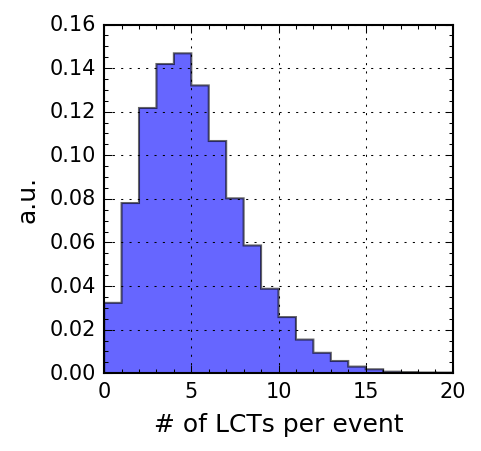

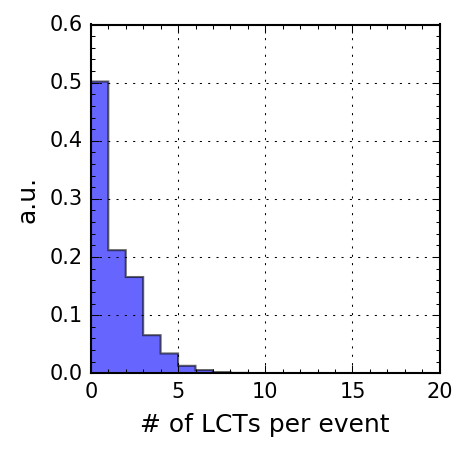

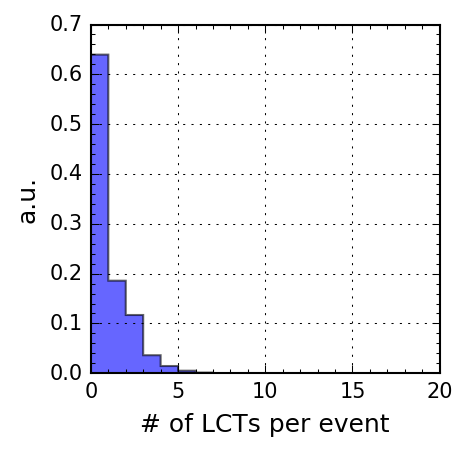

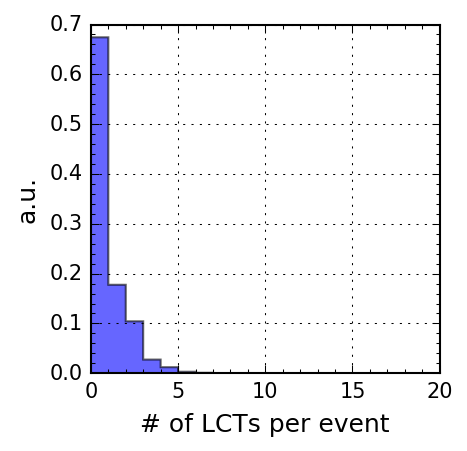

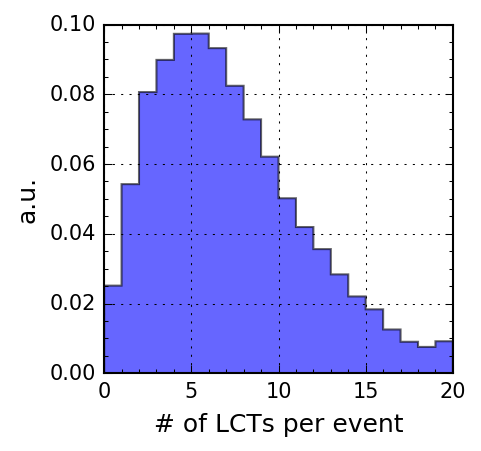

In [47]:
# All sectors

plt.style.use('tdrstyle.mplstyle')

def draw(x):
  plt.figure(figsize=(3,3))
  x = x.sum(axis=1)
  w = np.ones_like(x)/float(len(x))
  hist, edges, _ = plt.hist(x, bins=20, range=(0.,20.), weights=w, histtype='stepfilled', alpha=0.6)
  plt.xlabel('# of LCTs per event')
  plt.ylabel('a.u.')
  print np.mean(x), np.std(x)

counts_st1 = counts[:,:,:,0:18]
counts_st1 = counts_st1.reshape(len(jobs)*nevents_per_job, -1)
counts_st1 = np.clip(counts_st1, 0, 2)
draw(counts_st1)

counts_st2 = counts[:,:,:,18:27]
counts_st2 = counts_st2.reshape(len(jobs)*nevents_per_job, -1)
counts_st2 = np.clip(counts_st2, 0, 2)
draw(counts_st2)

counts_st3 = counts[:,:,:,27:36]
counts_st3 = counts_st3.reshape(len(jobs)*nevents_per_job, -1)
counts_st3 = np.clip(counts_st3, 0, 2)
draw(counts_st3)

counts_st4 = counts[:,:,:,36:45]
counts_st4 = counts_st4.reshape(len(jobs)*nevents_per_job, -1)
counts_st4 = np.clip(counts_st4, 0, 2)
draw(counts_st4)

counts_st5 = counts[:,:,:,:]
counts_st5 = counts_st5.reshape(len(jobs)*nevents_per_job, -1)
counts_st5 = np.clip(counts_st5, 0, 2)
draw(counts_st5)

0.3941354166666667 0.7139801747917512
0.08288125 0.30796284689082887
0.05205833333333333 0.2406552096476524
0.045033333333333335 0.2234229894666666
0.5741083333333333 1.0990543457584596


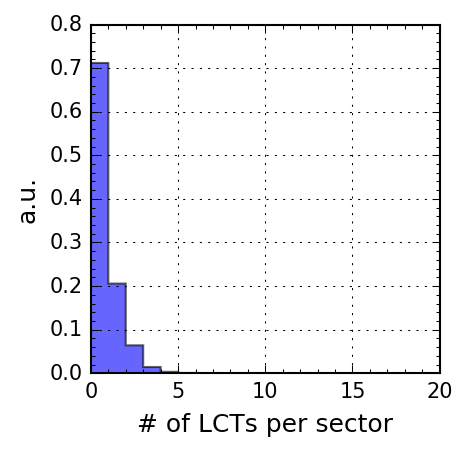

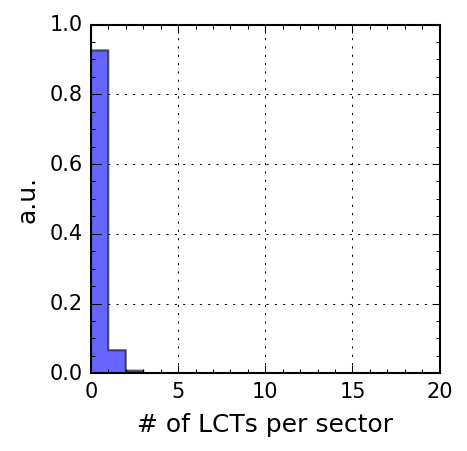

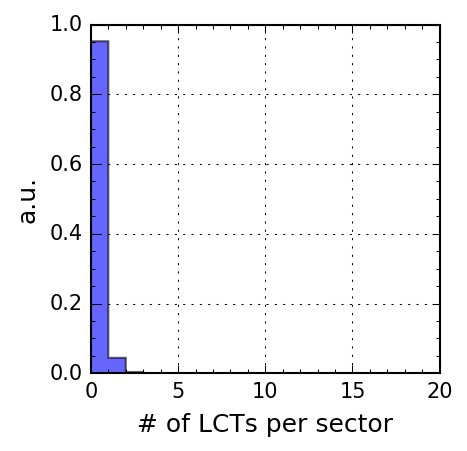

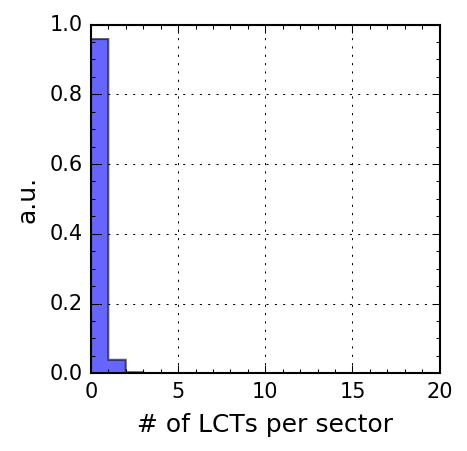

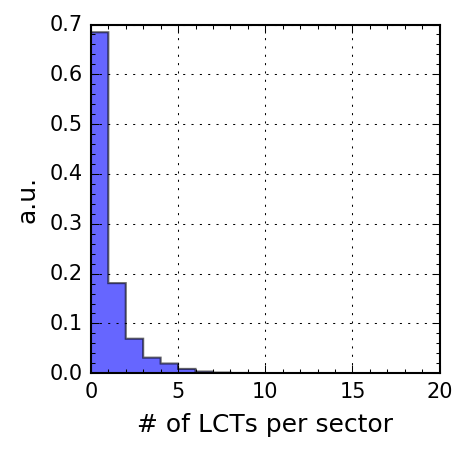

In [48]:
# Per sector

plt.style.use('tdrstyle.mplstyle')

def draw(x):
  plt.figure(figsize=(3,3))
  x = x.sum(axis=1)
  w = np.ones_like(x)/float(len(x))
  hist, edges, _ = plt.hist(x, bins=20, range=(0.,20.), weights=w, histtype='stepfilled', alpha=0.6)
  plt.xlabel('# of LCTs per sector')
  plt.ylabel('a.u.')
  print np.mean(x), np.std(x)

counts_st1 = counts[:,:,:,0:18]
counts_st1 = counts_st1.reshape(len(jobs)*nevents_per_job*12, -1)
counts_st1 = np.clip(counts_st1, 0, 2)
draw(counts_st1)

counts_st2 = counts[:,:,:,18:27]
counts_st2 = counts_st2.reshape(len(jobs)*nevents_per_job*12, -1)
counts_st2 = np.clip(counts_st2, 0, 2)
draw(counts_st2)

counts_st3 = counts[:,:,:,27:36]
counts_st3 = counts_st3.reshape(len(jobs)*nevents_per_job*12, -1)
counts_st3 = np.clip(counts_st3, 0, 2)
draw(counts_st3)

counts_st4 = counts[:,:,:,36:45]
counts_st4 = counts_st4.reshape(len(jobs)*nevents_per_job*12, -1)
counts_st4 = np.clip(counts_st4, 0, 2)
draw(counts_st4)

counts_st5 = counts[:,:,:,:]
counts_st5 = counts_st5.reshape(len(jobs)*nevents_per_job*12, -1)
counts_st5 = np.clip(counts_st5, 0, 2)
draw(counts_st5)

#### EMTF track multiplicities from Luca

<img src="luca_multiplicities.png"/>